<a href="https://colab.research.google.com/github/aleckvijay/CVPROJECT/blob/main/Copy_of_EmbeddedML_Assignment2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_Assignment2.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---



### In the first section of the assignment, you will design a Convolutional Neural Network (CNN) to classify the Cifar-10 dataset. In the second section, you will design a Bean Disease Classifier to categorize healthy and diseased beans.

# 1.Create a CNN to classify Cifar-10

In the previous assignment you built a CNN that classified 10 different apparel from the Fashion MNIST dataset. For this section, you will use a similar network but there are some key differences you'll need to take into account. Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html


---


**Question 1**: Can you think of two differences in the model required to classify the Cifar-10 Dataset and the Fashion MNIST Dataset?

**Answer:**




---





### Load Dataset

We set up the problem by first loading the dataset and splitting into train and test sets.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


### Normalize Images

In [2]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

### Visualize Sample Training Examples

Explore the images from the Cifar-10 dataset. Could it help you determine the input shape and the layers of the machine learning model?

First, print the shape of the training images, training labels, test images and test labels.

In [3]:
# TODO - print shapes of train and test sets

print("Train images shape: ", train_images.shape)
print("Train labels shape: ", train_labels.shape)
print("Test images shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)


Train images shape:  (50000, 32, 32, 3)
Train labels shape:  (50000, 1)
Test images shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


---


**Question 2:** Plot the first 3 training images along with the training labels.




---



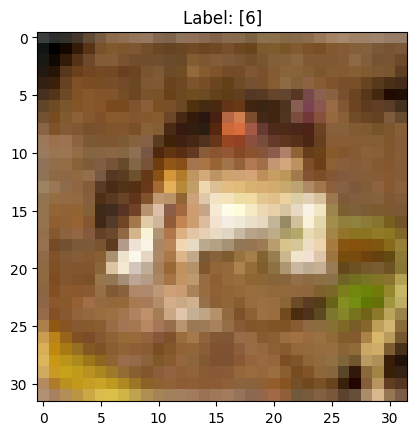

In [5]:
# TODO: plot 1st training example
plt.imshow(train_images[0])
plt.title(f"Label: {train_labels[0]}")
plt.show()

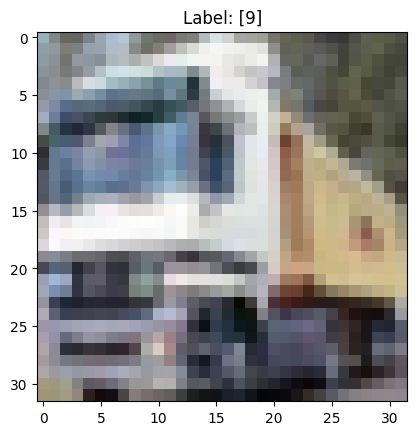

In [7]:
# TODO: plot 2nd training example
plt.imshow(train_images[1])
plt.title(f"Label: {train_labels[1]}")
plt.show()

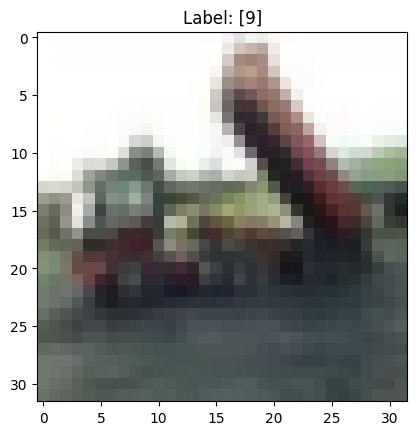

In [8]:
# TODO: plot 3rd training example
plt.imshow(train_images[2])
plt.title(f"Label: {train_labels[2]}")
plt.show()

### Define Model

It's now time to define your CNN. Experient with different no. of layers enough to get above 85% training accuracy and above 70% validation accuracy!

***Hint:*** your model may want to learn some high level features and then classify them i.e., first define Conv2D and MaxPooling2D layers followed by Dense layers.

In [9]:
# TODO: Define your model layers!

model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Transition from convolutional blocks to dense layers
    layers.Flatten(),

    # First dense layer
    layers.Dense(128, activation='relu'),

    # Second dense layer (output layer)
    layers.Dense(10, activation='softmax')
    ])

Define an appropriate loss function and optimizer. Then compile your model!

In [10]:
# TODO: Define the loss function and optimizer and compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

Now train your model for a fixed number of epochs. You can experiment with this hyperparameter (NUM_EPOCHS) to get the desired accuracy (above 85% training accuracy and above 70% validation accuracy)

In [11]:
NUM_EPOCHS = 5


# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))



Epoch 1/5
1563/1563 [==============================] - 22s 6ms/step - loss: 1.4490 - accuracy: 0.4720 - val_loss: 1.1732 - val_accuracy: 0.5840
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0622 - accuracy: 0.6267 - val_loss: 1.0035 - val_accuracy: 0.6547
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8950 - accuracy: 0.6852 - val_loss: 0.9161 - val_accuracy: 0.6801
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7811 - accuracy: 0.7254 - val_loss: 0.8757 - val_accuracy: 0.6917
Epoch 5/5
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6883 - accuracy: 0.7587 - val_loss: 0.8018 - val_accuracy: 0.7279


### Plot Accuracy vs Epochs

Finally, plot a single graph of both training and test (validation) accuracies vs Epochs. Be sure to include a legend and x & y axis labels.


***Hint1:*** Use information stored in 'history'.

***Hint2:*** Use plt.plot()

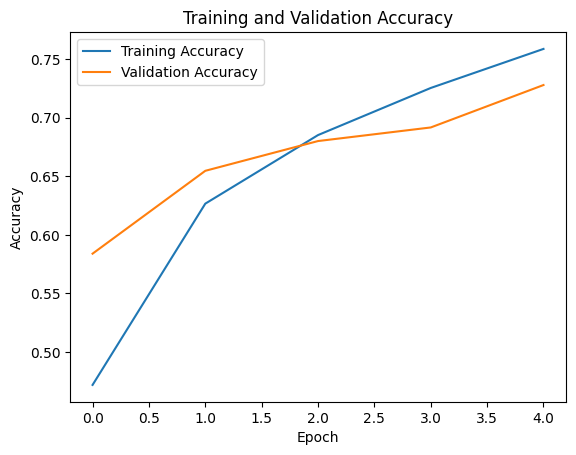

In [12]:
# TODO: Plot train and test (validation) accuracies vs Epochs on a single plot

# Plotting training and validation accuracies
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 2. Bean Disease Classifier
For this section of the assignment, you'll take what you've learned so far and build a classifier for bean diseases. You'll be provided with training and validation data of images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [13]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Load Dataset

In [15]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [16]:
# Do not change this code
!gdown "https://huggingface.co/datasets/beans/resolve/main/data/train.zip" -O /tmp/train.zip
!gdown "https://huggingface.co/datasets/beans/resolve/main/data/validation.zip" -O /tmp/validation.zip
!gdown "https://huggingface.co/datasets/beans/resolve/main/data/test.zip" -O /tmp/test.zip

Downloading...
From: https://huggingface.co/datasets/beans/resolve/main/data/train.zip
To: /tmp/train.zip
100% 144M/144M [00:00<00:00, 214MB/s]
Downloading...
From: https://huggingface.co/datasets/beans/resolve/main/data/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 47.1MB/s]
Downloading...
From: https://huggingface.co/datasets/beans/resolve/main/data/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 99.6MB/s]


The .zip files are extracted and loaded into three directories - train, validation, and test. Each of them further have three directories each representing the 3 classes.

You can find them in the **tmp/** directory in the files tab on the left.

In [17]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Display example images

Visualize some training examples from each of the three classes. Use the below defined function `show_img()` to plot an example image of the *angular_leaf_spot*, *bean_rust*, and *healthy* classes from the train directory.

The required data can be found in the tmp/ folder under Files on the left tab.


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_img(path, file_name):
    image = mpimg.imread(path + file_name)
    plt.imshow(image)
    plt.show()

Plot an example from the ***angular_leaf_spot*** class.


***Hint:*** You can find the path of the required directory by right-clicking on the three vertical dots and choosing 'Copy path' (hover the cursor over the directory)

In [ ]:
# TODO - Define path and filename and display a training example


Plot an example from the ***bean_rust*** class.

In [ ]:
# TODO - Define path and filename and display a training example


Plot an example from the ***healthy*** class.

In [ ]:
# TODO - Define path and filename and display a training example


### Define Generator to include Image Augmentation

Define a generator (```ImageDataGenerator```) to process the train and validation data we have loaded in Colab so that our model can use it for training.

Include the following Image Augmentation parametes for the **train data generator**.

> rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'.

Include the following Image Augmentation parametes for the **validation data generator**.

> rescale=1./255



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = # < YOUR CODE HERE >

validation_datagen = # < YOUR CODE HERE >



TRAIN_DIRECTORY_LOCATION = '/tmp/train/'
VAL_DIRECTORY_LOCATION = '/tmp/validation/'
TARGET_SIZE = target_size=(224, 224)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = # < YOUR CODE HERE >

### Define Model

Now its your turn to define a model to learn this data. Experient with different no. of layers enough to get above 75% training accuracy and above 70% validation accuracy! Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them.

**Note:** Be careful of the input shape of the first Conv2D layer.



In [ ]:
# TODO - Define CNN


Print your model summary!

In [ ]:
# TODO - Print a summary of your model


---


**Question 3**: Why are the number of parameters learned in the MaxPooling layers =  0?

**Answer:**

---


Pick an appropriate loss function and optimizer. Then compile your model! Don't forget to define your metric!

In [ ]:
# TODO: Define Loss Function and Optimizer. Compile Model


### Train Model

Now train your model for a fixed number of epochs. You can experiment with this hyperparameter (NUM_EPOCHS) to get the desired accuracy (above 75% training accuracy and above 70% validation accuracy)


In [ ]:
NUM_EPOCHS = 20


history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

### Plot Accuracy vs Epochs

Finally, similar to section 1, plot a graph of both training and test (validation) accuracies vs Epochs. Include a legend and x & y axis labels.


In [ ]:
# TODO: Plot train and test accuracies vs Epochs
